In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

%matplotlib inline
plt.rcParams['figure.figsize'] = [30, 10]

save_path = os.path.join('Graphs', 'Overall')

In [2]:
confirmed_cases = pd.read_csv('confirmed_cases.csv')
deaths = pd.read_csv('deaths.csv')
recoveries = pd.read_csv('recoveries.csv')

In [3]:
confirmed_cases.drop(columns = ['Province/State', 'Lat', 'Long'], inplace = True)
deaths.drop(columns = ['Province/State', 'Lat', 'Long'], inplace = True)
recoveries.drop(columns = ['Province/State', 'Lat', 'Long'], inplace = True)

In [4]:
def getSumOfDf(country, confirmed, deaths, recoveries, min_date = False):
    cs = confirmed[confirmed['Country/Region'] == country].sum()
    cs.drop('Country/Region', inplace = True)
    
    ds = deaths[deaths['Country/Region'] == country].sum()
    ds.drop('Country/Region', inplace = True)
    
    rs = recoveries[recoveries['Country/Region'] == country].sum()
    rs.drop('Country/Region', inplace = True)
    
    vals = list(cs.iteritems())
    earliest_date = ''
    
    for i, v in enumerate(vals):
        if vals[i + 1][1] > 0:
            earliest_date = v[0]
            break
            
    if min_date:
        earliest_date = min_date
            
    for date, _ in cs.iteritems():
        if date == earliest_date:
            break
        else:
            cs.drop(date, inplace = True)
            
    for date, _ in ds.iteritems():
        if date == earliest_date:
            break
        else:
            ds.drop(date, inplace = True)
            
    for date, _ in rs.iteritems():
        if date == earliest_date:
            break
        else:
            rs.drop(date, inplace = True)
            
    return cs, ds, rs

In [18]:
china_cases, china_deaths, china_recoveries = getSumOfDf('China', confirmed_cases, deaths, recoveries)
italy_cases, italy_deaths, italy_recoveries = getSumOfDf('Italy', confirmed_cases, deaths, recoveries, '2/19/20')
iran_cases, iran_deaths, iran_recoveries = getSumOfDf('Iran', confirmed_cases, deaths, recoveries, '2/24/20')
sk_cases, sk_deaths, sk_recoveries = getSumOfDf('Korea, South', confirmed_cases, deaths, recoveries, '2/18/20')
us_cases, us_deaths, us_recoveries = getSumOfDf('US', confirmed_cases, deaths, recoveries, '3/8/20')
india_cases, india_deaths, india_recoveries = getSumOfDf('India', confirmed_cases, deaths, recoveries, '3/2/20')

In [13]:
world_cases = confirmed_cases.sum().drop('Country/Region')
world_deaths = deaths.sum().drop('Country/Region')
world_recoveries = recoveries.sum().drop('Country/Region')

In [7]:
def plotForCountry(country, cases, deaths, recoveries, scale = 100):
    plt.plot(cases, label = 'Total confirmed cases')
    plt.plot(deaths, label = 'Total deaths')
    plt.plot(recoveries, label = 'Total recoveries')
    plt.plot(cases - recoveries - deaths, label = 'Total active cases')
    plt.title(f'CoVID-19 in {country}')
    plt.legend()
    ticks = plt.xticks(rotation = 85)
    step = round(cases.max() / (15 * scale)) * scale
    ticks = plt.yticks(np.arange(0, cases.max() + step + scale / 2, step))
    plt.rcParams.update({'font.size': 22})
    plt.tight_layout()
    plt.grid()
    plt.savefig(os.path.join(save_path, f'{country}.png'))

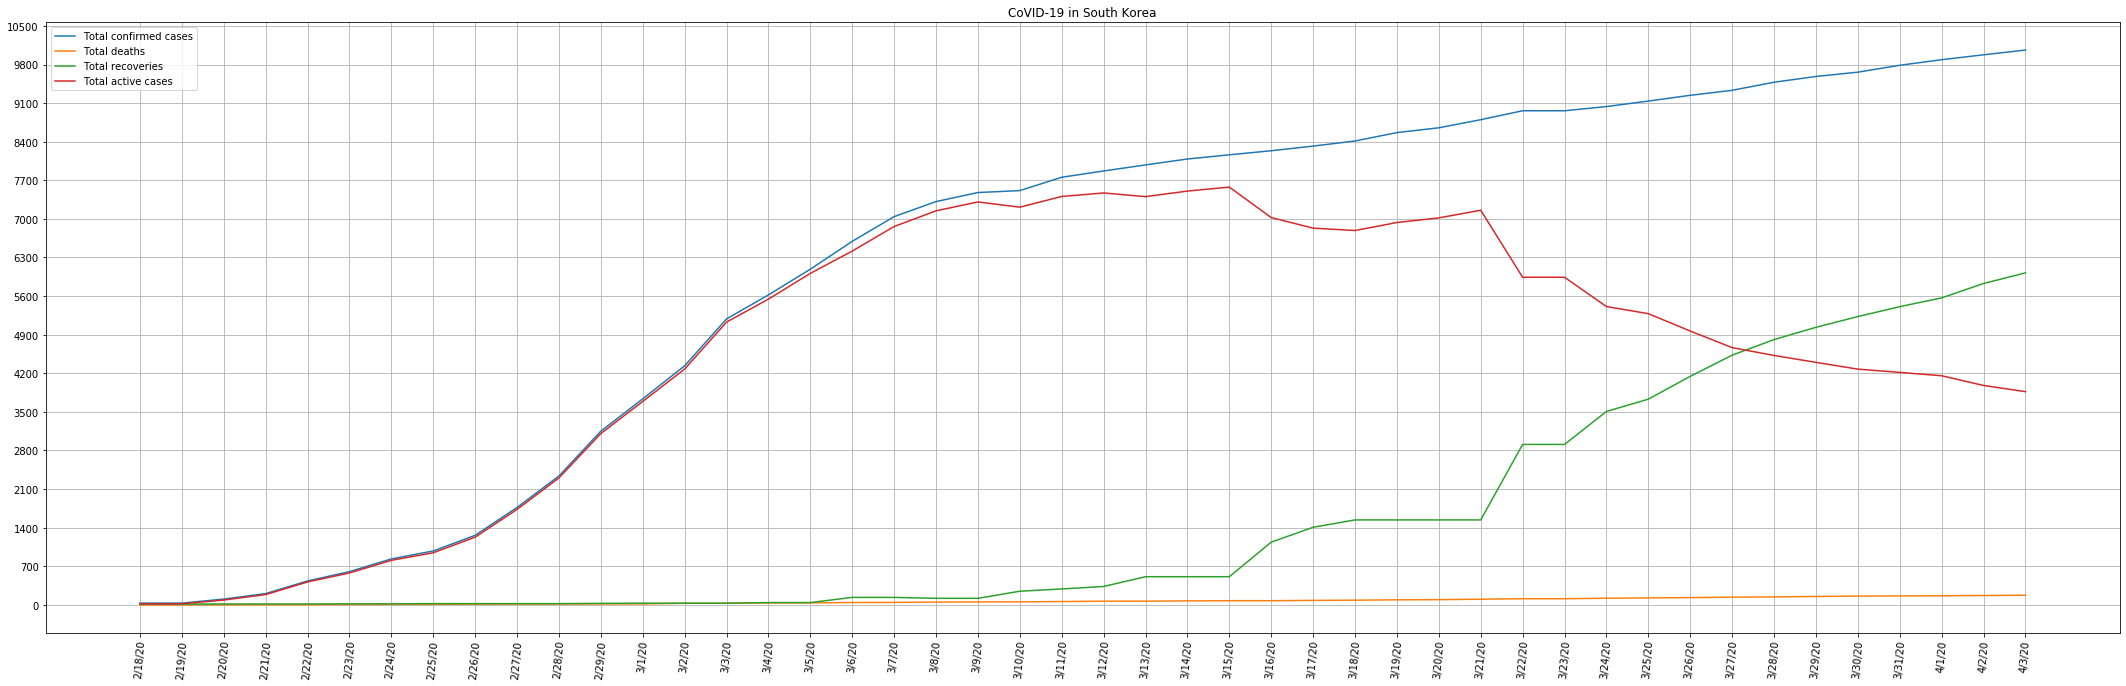

In [8]:
plotForCountry('South Korea', sk_cases, sk_deaths, sk_recoveries)

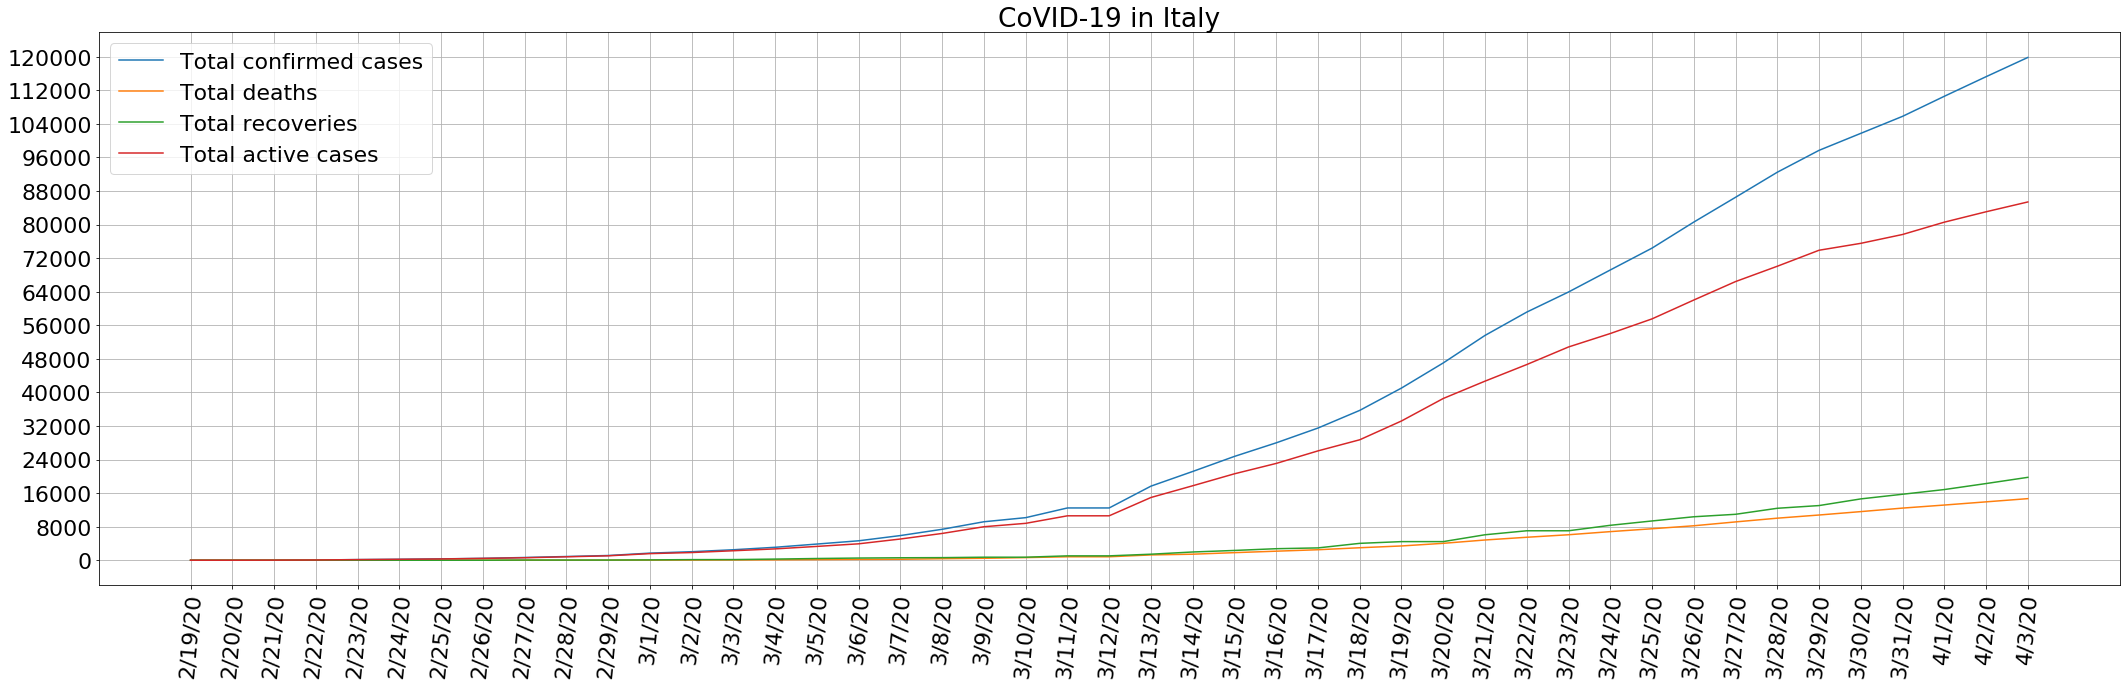

In [9]:
plotForCountry('Italy', italy_cases, italy_deaths, italy_recoveries)

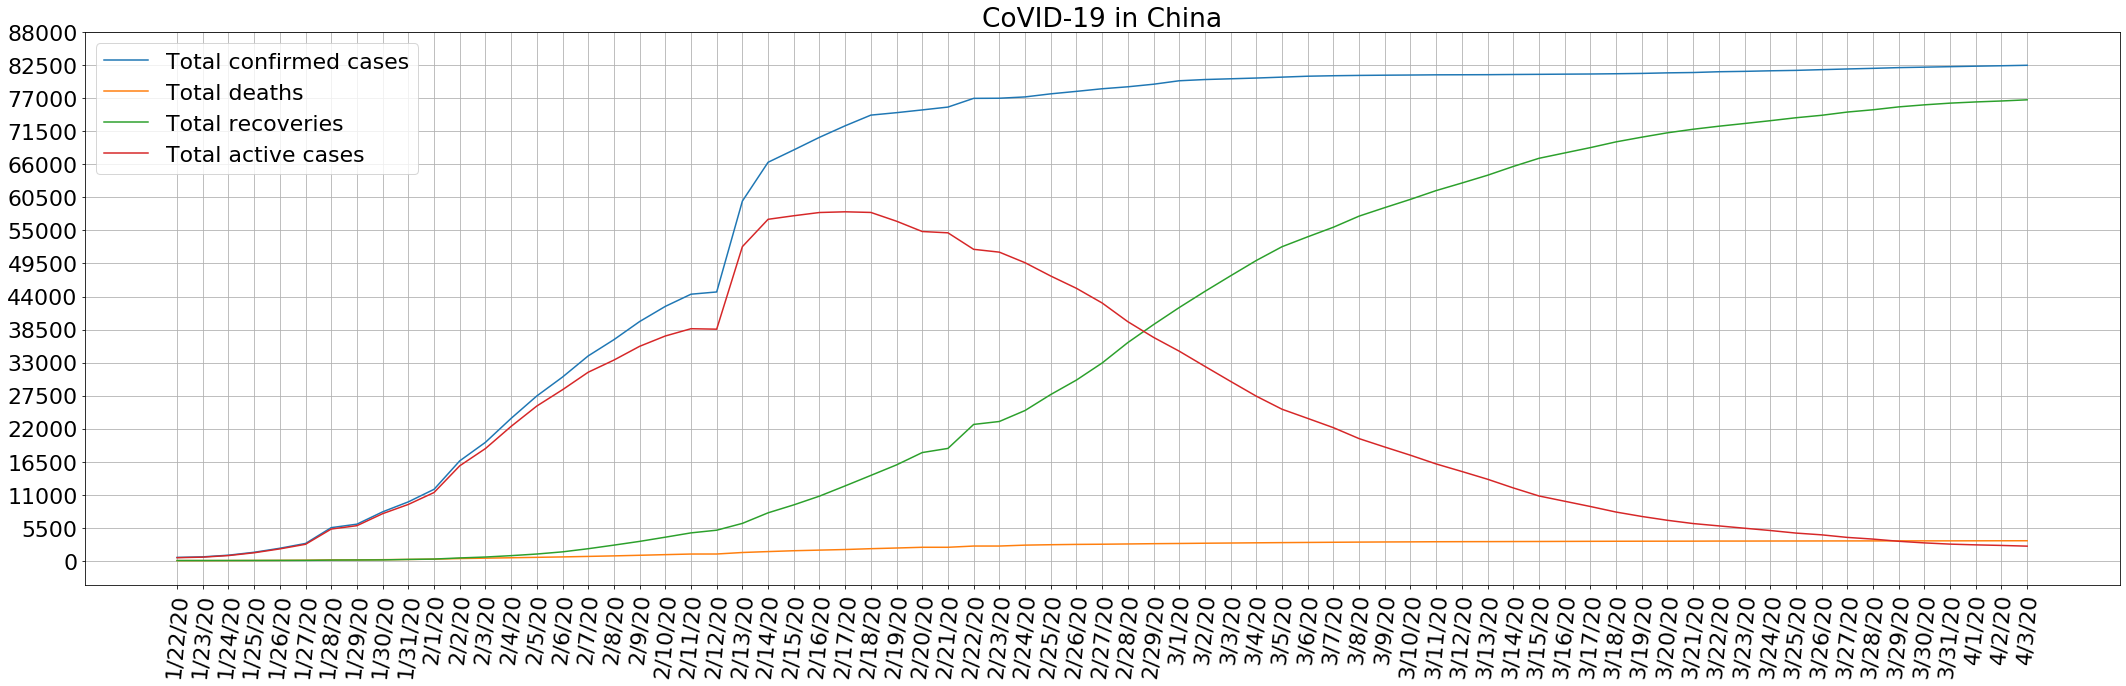

In [10]:
plotForCountry('China', china_cases, china_deaths, china_recoveries)

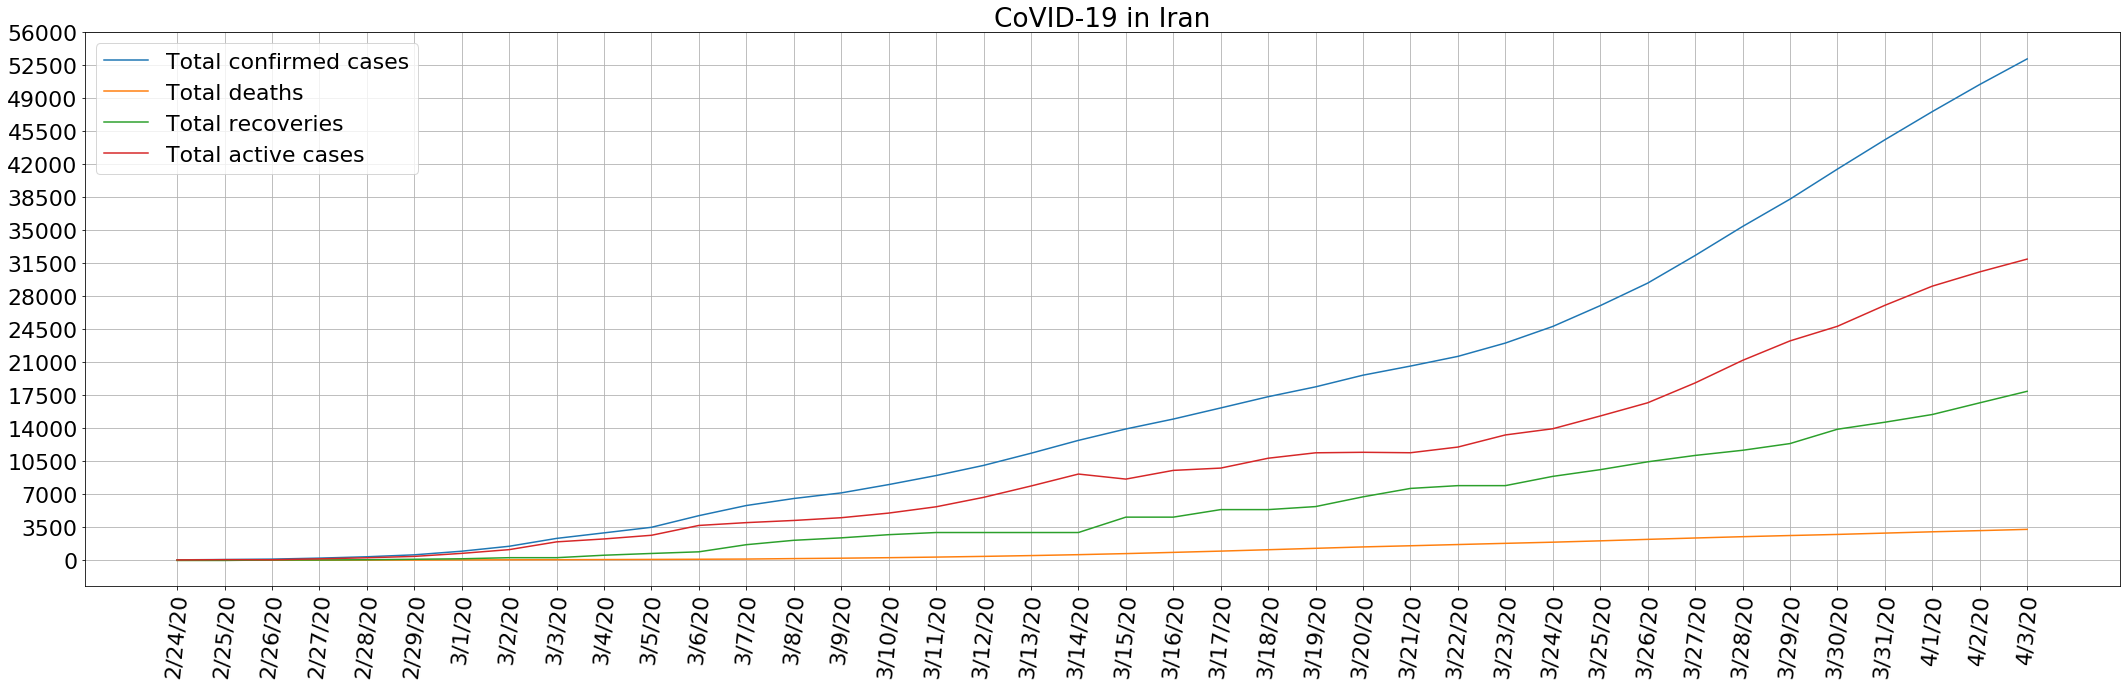

In [11]:
plotForCountry('Iran', iran_cases, iran_deaths, iran_recoveries)

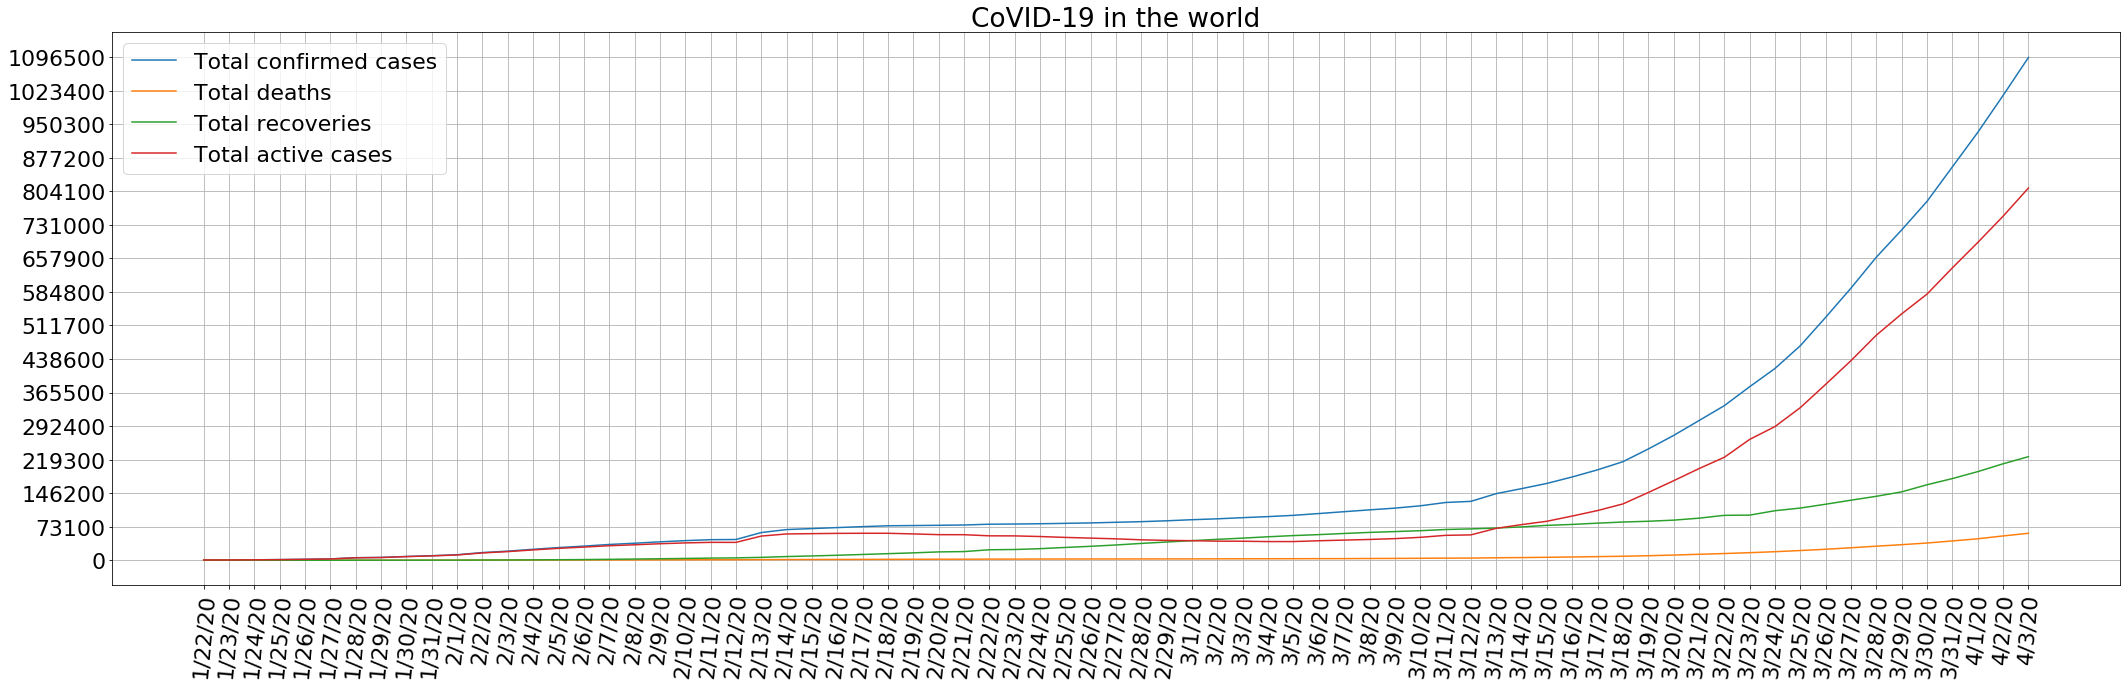

In [14]:
plotForCountry('the world', world_cases, world_deaths, world_recoveries)

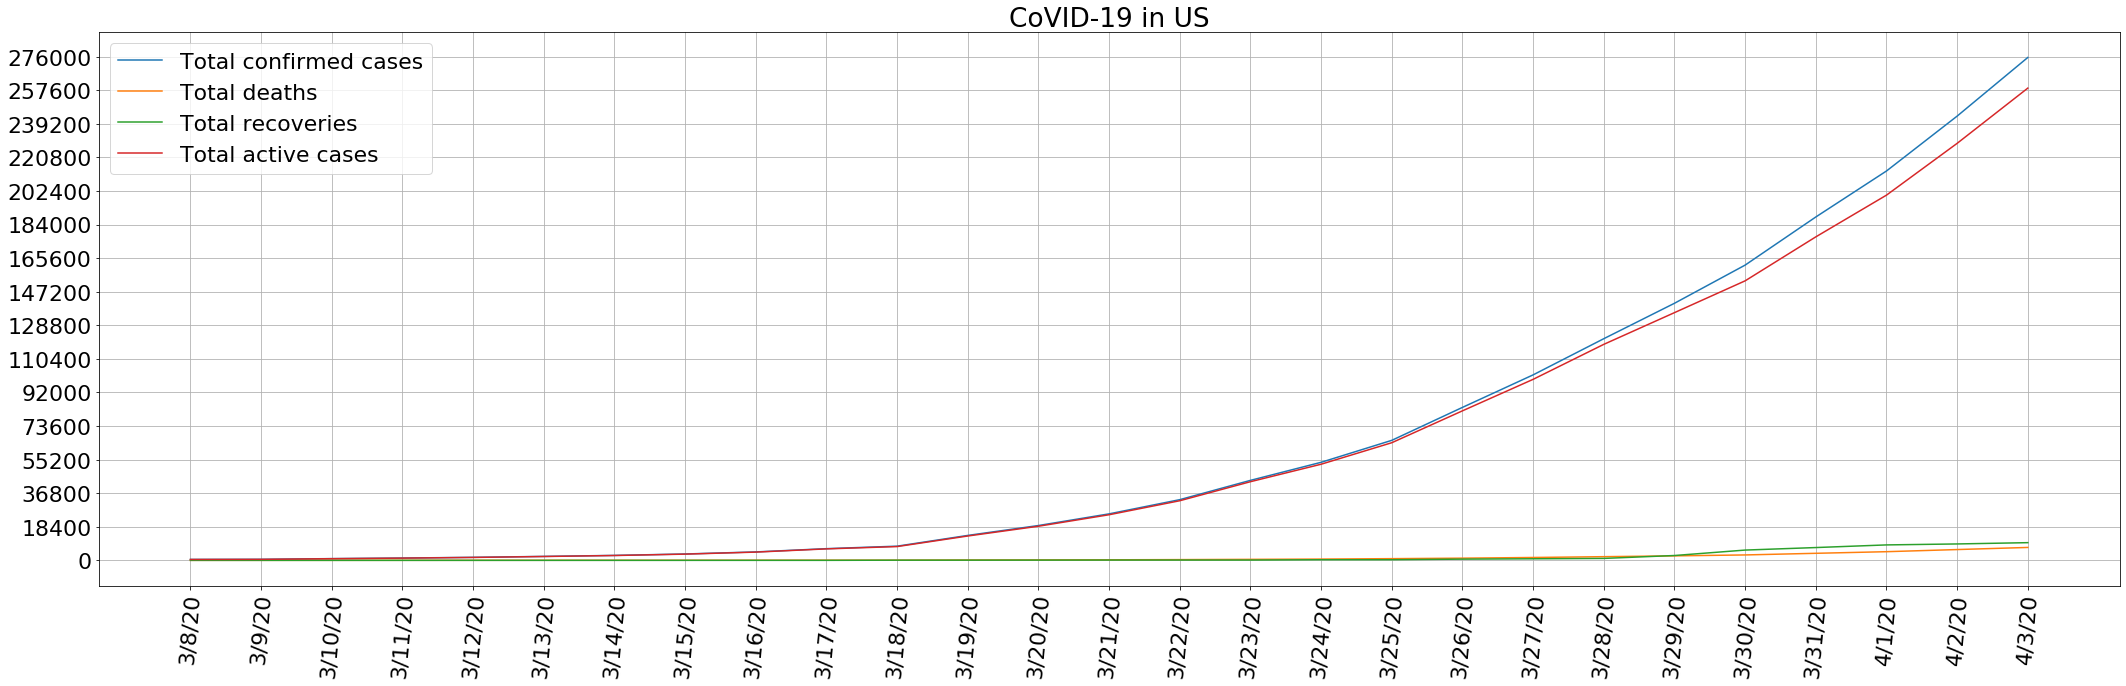

In [19]:
plotForCountry('US', us_cases, us_deaths, us_recoveries)

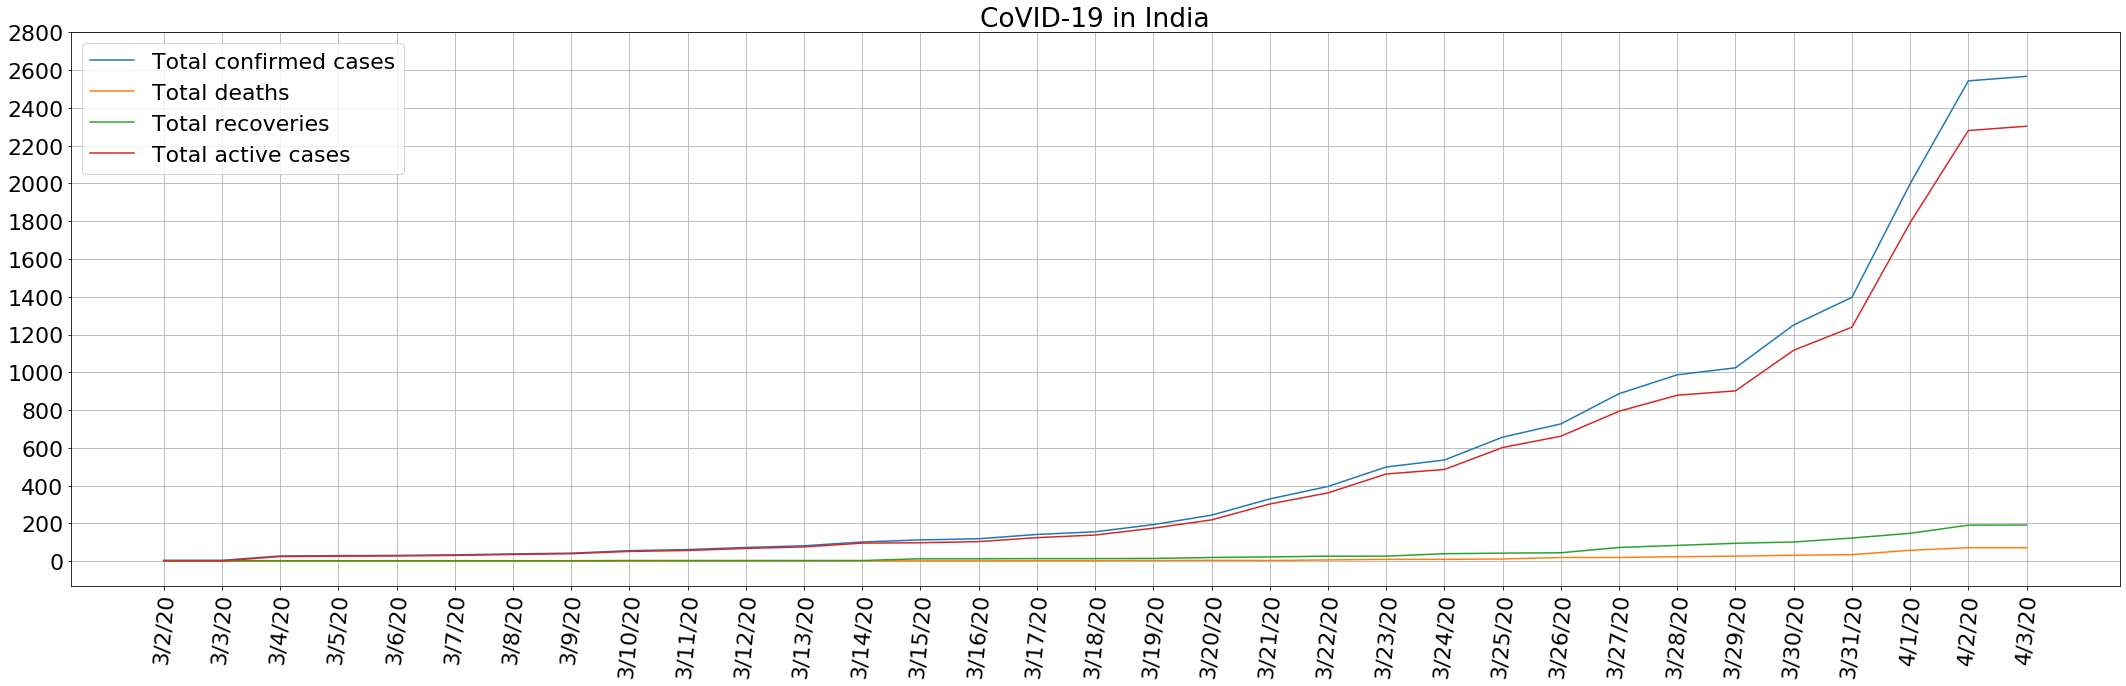

In [20]:
plotForCountry('India', india_cases, india_deaths, india_recoveries)